In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Importando Dasdos

In [13]:
data = pd.read_csv('./kc2.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Árvore de Decisão

### Treinando o modelo

In [109]:
folder = KFold(n_splits=10)
gini_model = DecisionTreeClassifier(criterion='gini')
entropy_model = DecisionTreeClassifier(criterion='entropy')

metrics = np.zeros((2, 10, 4))

for i, (train_index, test_index) in enumerate(folder.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    gini_model.fit(X_train, y_train)
    entropy_model.fit(X_train, y_train)
    
    gini_pred = gini_model.predict(X_test)
    entropy_pred = entropy_model.predict(X_test)
    
    metrics[0][i] = np.array([accuracy_score(y_test, gini_pred),
                              recall_score(y_test, gini_pred, zero_division=0),
                              precision_score(y_test, gini_pred),
                              f1_score(y_test, gini_pred)])
    
    metrics[1][i] = np.array([accuracy_score(y_test, entropy_pred),
                              recall_score(y_test, entropy_pred, zero_division=0),
                              precision_score(y_test, entropy_pred),
                              f1_score(y_test, entropy_pred)])
    

### Plotando os resultados

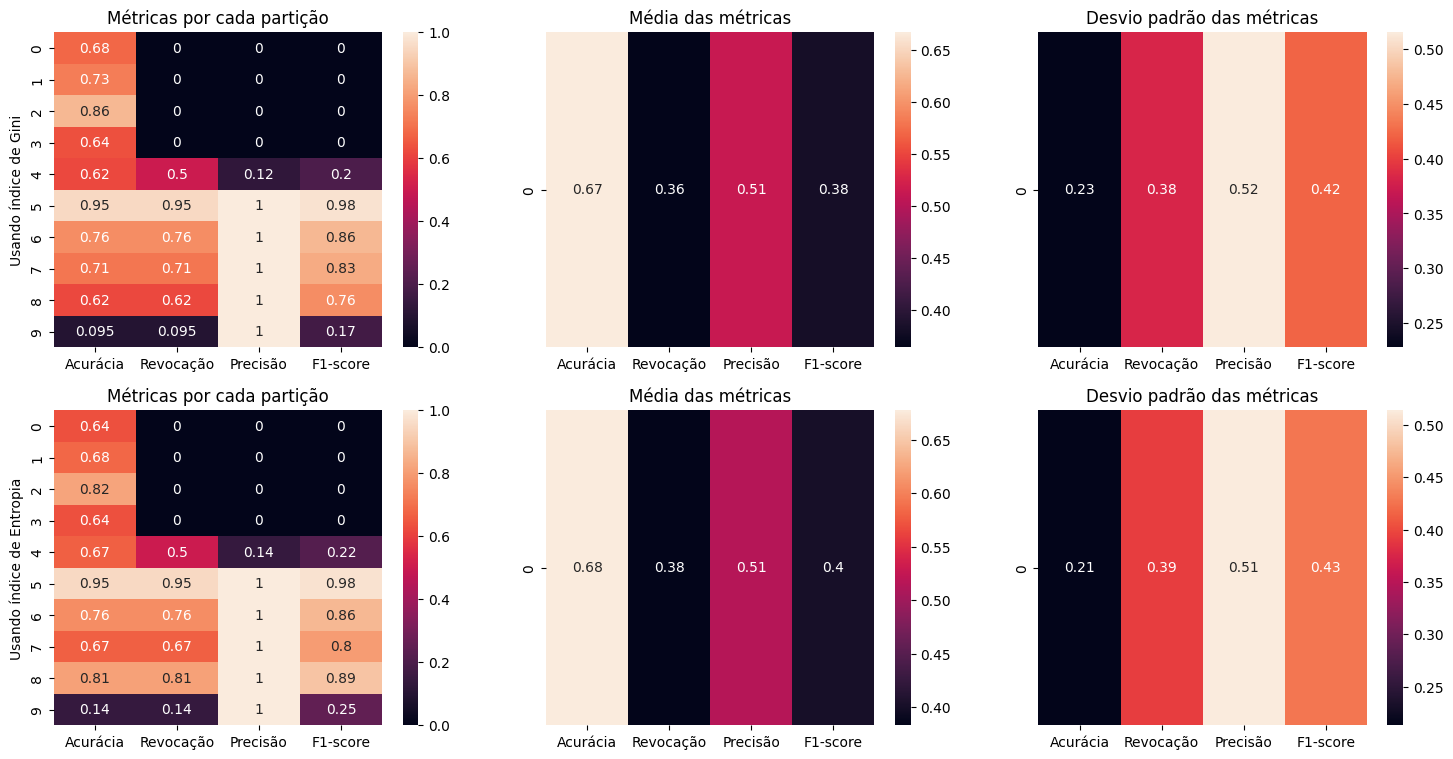

In [110]:
fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(18, 9))

x_labels = ['Acurácia', 'Revocação', 'Precisão', 'F1-score']

gini_fold = sns.heatmap(metrics[0], annot=True, xticklabels=x_labels, ax=ax1[0])
gini_mean = sns.heatmap([np.mean(metrics[0], axis=0)], annot=True, xticklabels=x_labels, ax=ax1[1])
gini_standard = sns.heatmap([np.std(metrics[0], axis=0, ddof=1)], annot=True, xticklabels=x_labels, ax=ax1[2])

entropy_fold = sns.heatmap(metrics[1], annot=True, xticklabels=x_labels, ax=ax2[0])
entropy_mean = sns.heatmap([np.mean(metrics[1], axis=0)], annot=True, xticklabels=x_labels, ax=ax2[1])
entropy_standard = sns.heatmap([np.std(metrics[1], axis=0, ddof=1)], annot=True, xticklabels=x_labels, ax=ax2[2])

ax1[0].set_title('Métricas por cada partição')
ax1[1].set_title('Média das métricas')
ax1[2].set_title('Desvio padrão das métricas')
ax1[0].set_ylabel('Usando índice de Gini')

ax2[0].set_title('Métricas por cada partição')
ax2[1].set_title('Média das métricas')
ax2[2].set_title('Desvio padrão das métricas')
ax2[0].set_ylabel('Usando índice de Entropia')

plt.show()